Project on Prediction of Motor and Total UPDRS scores

Importing Libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

Loading The Dataset and checking the summary statistics


In [35]:
data = pd.read_csv('po2_data.csv')

#display the first few rows of the dataset
print(data.head())
#summary statistics of the dataset
print("Summary Statistics:")
print(data.describe())
print(data.info())

#check for missing values
print("Missing Values:")
print(data.isnull().sum())

   subject#  age  sex  test_time  motor_updrs  total_updrs  jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   jitter(abs)  jitter(rap)  jitter(ppq5)  ...  shimmer(abs)  shimmer(apq3)  \
0     0.000034      0.00401       0.00317  ...         0.230        0.01438   
1     0.000017      0.00132       0.00150  ...         0.179        0.00994   
2     0.000025      0.00205       0.00208  ...         0.181        0.00734   
3     0.000027      0.00191       0.00264  ...         0.327        0.01106   
4     0.000020      0.00093       0.00130  ...         0.176        0.00679   

   shimmer(apq5)  shimmer(apq11)  shimmer(dda)       nhr     hnr     rpde  \
0        

In [36]:
print(data.describe())

          subject#          age          sex    test_time  motor_updrs  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_updrs    jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000   5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987      0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124      0.003732  ...   
min       7.0

Visualizations to explore the distribution of dataset

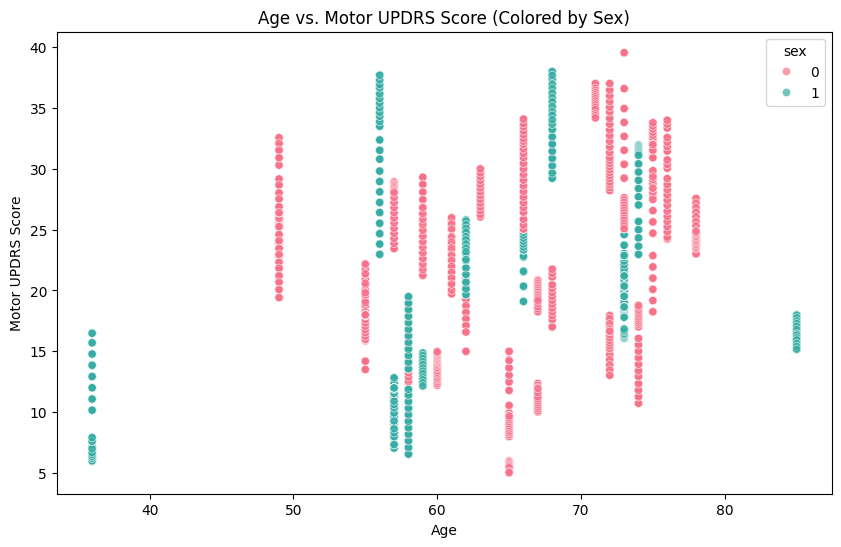

In [8]:

#visualize  relationship between age and motor drs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='motor_updrs', hue='sex', palette='husl', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Motor UPDRS Score')
plt.title('Age vs. Motor UPDRS Score (Colored by Sex)')
plt.show()


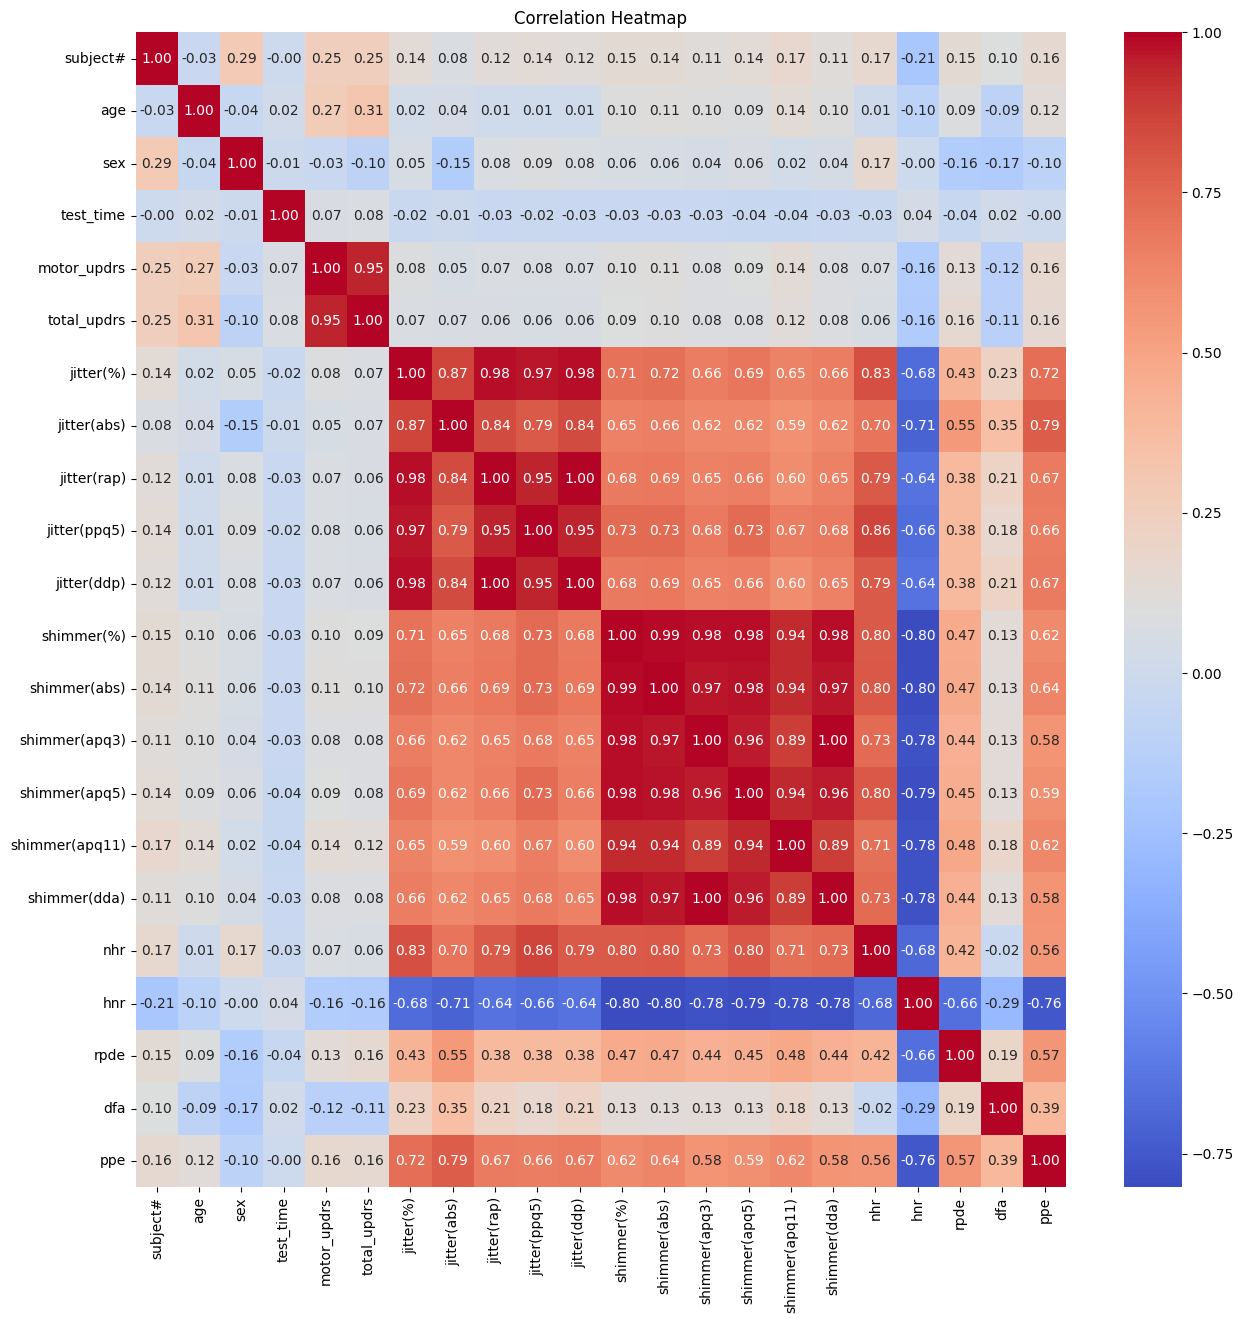

In [31]:
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

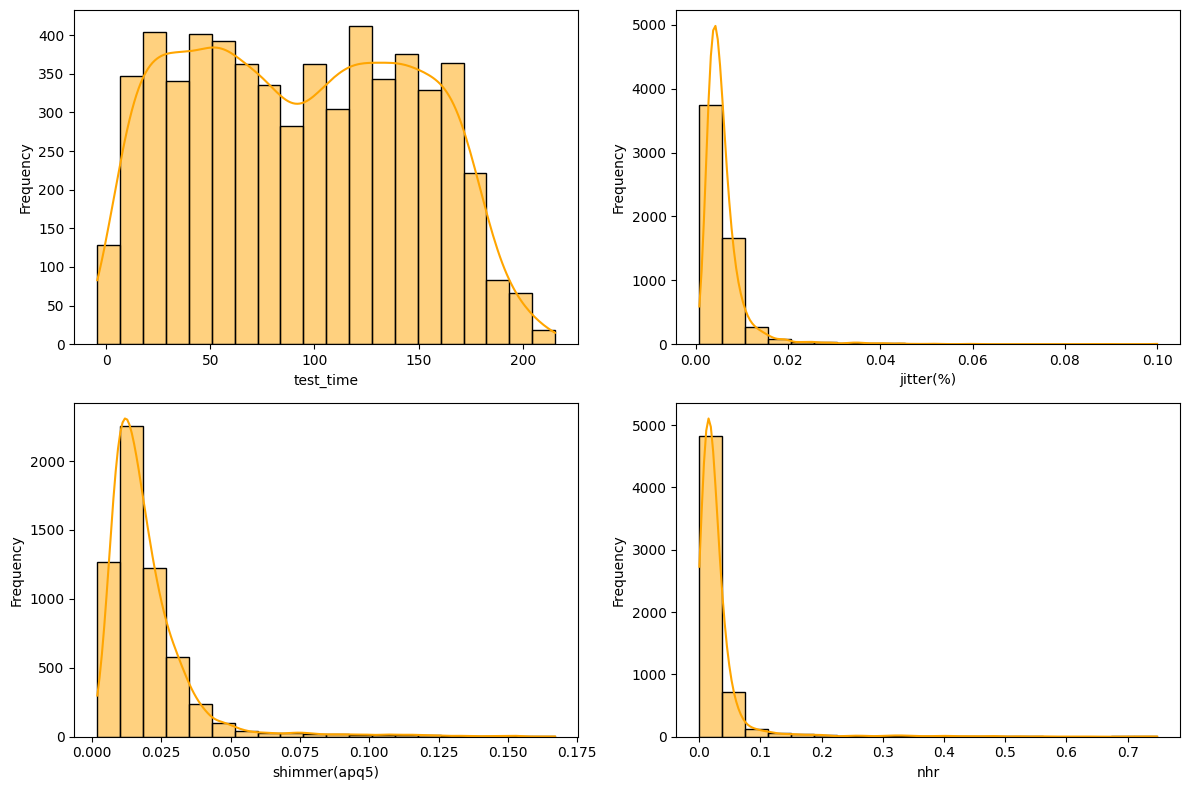

In [10]:
#histograms for features
selected_features = ['test_time', 'jitter(%)', 'shimmer(apq5)', 'nhr']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, bins=20, kde=True, color='orange')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Data Preparation for Modeling: The code splits the data into features (X) and two targets (y_motor_target for motor UPDRS scores and y_total_target for total UPDRS scores). This data is then split into training and testing datasets.

In [11]:
X = data.drop(['motor_updrs', 'total_updrs'], axis=1)
y_motor_target = data['motor_updrs'] 
y_total_target = data['total_updrs'] 
#now we split our data into training and testing set
X_train_features, X_test_features, y_motor_train_target, y_motor_test_target, y_total_train_target, y_total_test_target = train_test_split(
    X, y_motor_target, y_total_target, test_size=0.2, random_state=456)

Model Training & Prediction:Now we train two separate linear regression models , one for each of the targets.

In [13]:
motor_regression_model = LinearRegression()
total_regression_model = LinearRegression()

#her we normalize features using standard scalar
scaler = StandardScaler()
X_train_scaled_features = scaler.fit_transform(X_train_features)
X_test_scaled_features = scaler.transform(X_test_features)

#now we begin training of the model
motor_regression_model.fit(X_train_scaled_features, y_motor_train_target)
total_regression_model.fit(X_train_scaled_features, y_total_train_target)

#here we make predictions
motor_score_predictions = motor_regression_model.predict(X_test_scaled_features)
total_score_predictions = total_regression_model.predict(X_test_scaled_features)


Model Evaluation: we use Various metrics, including Mean Squared Error (MSE), R-squared, Explained Variance Score, and Mean Absolute Error (MAE),  for both models. We also provide a visual representations of these metrics using bar plots.

In [21]:
#ccalculating evaluation metrics for Motor UPDRS Model
motor_mse = mean_squared_error(y_motor_test_target, motor_score_predictions)
motor_r2 = r2_score(y_motor_test_target, motor_score_predictions)
motor_evs = explained_variance_score(y_motor_test_target, motor_score_predictions)
motor_mae = mean_absolute_error(y_motor_test_target, motor_score_predictions)

#Printing metrics for Motor UPDRS Model
print("\nMotor UPDRS Model:")
print(f"Mean Squared Error (MSE): {motor_mse:.4f}")
print(f"R-squared (R2): {motor_r2:.4f}")
print(f"Explained Variance Score: {motor_evs:.4f}")
print(f"Mean Absolute Error (MAE): {motor_mae:.4f}")

#Calculating evaluation metrics for Total UPDRS Model
total_mse = mean_squared_error(y_total_test_target, total_score_predictions)
total_r2 = r2_score(y_total_test_target, total_score_predictions)
total_evs = explained_variance_score(y_total_test_target, total_score_predictions)
total_mae = mean_absolute_error(y_total_test_target, total_score_predictions)

#printing metrics for Total UPDRS Model
print("\nTotal UPDRS Model:")
print(f"Mean Squared Error (MSE): {total_mse:.4f}")
print(f"R-squared (R2): {total_r2:.4f}")
print(f"Explained Variance Score: {total_evs:.4f}")
print(f"Mean Absolute Error (MAE): {total_mae:.4f}")



Motor UPDRS Model:
Mean Squared Error (MSE): 51.6209
R-squared (R2): 0.2113
Explained Variance Score: 0.2119
Mean Absolute Error (MAE): 5.9752

Total UPDRS Model:
Mean Squared Error (MSE): 86.3918
R-squared (R2): 0.2498
Explained Variance Score: 0.2501
Mean Absolute Error (MAE): 7.5290


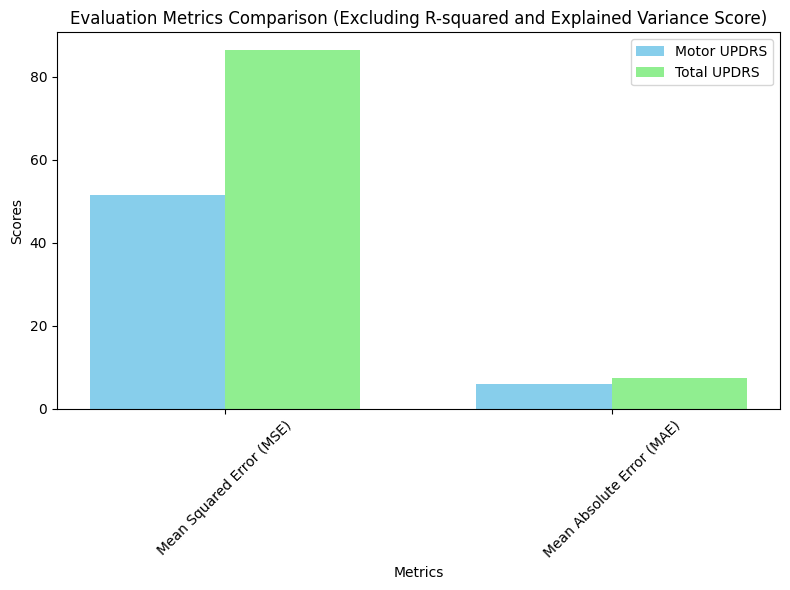

In [28]:

#evaluation metrics for both models (excluding R-squared and Explained Variance Score)
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)']
motor_scores = [motor_mse, motor_mae]
total_scores = [total_mse, total_mae]

n_metrics = len(metrics)

ind = np.arange(n_metrics)
width = 0.35

#create a grouped bar chart
plt.figure(figsize=(8, 6))
plt.bar(ind, motor_scores, width, label='Motor UPDRS', color='skyblue')
plt.bar(ind + width, total_scores, width, label='Total UPDRS', color='lightgreen')

#add labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison (Excluding R-squared and Explained Variance Score)')
plt.xticks(ind + width / 2, metrics, rotation=45)
plt.legend()

#display the chart
plt.tight_layout()
plt.show()
